# Sentiment Analysis 

Import of required packages.

In [1]:
# import sys
# !{sys.executable} -m pip install wordcloud

In [17]:
from textblob import TextBlob as txt
import nltk as nltk
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re
import string
nltk.download('stopwords')

# github: https://github.com/Krisselack/FHWN_Analysewerkzeuge

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/christian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Autoren: 
Oliver Greimeister
Benjamin Chissico 
Christian Brandstätter

In [18]:
# centering stuff
from IPython.display import display, HTML
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

Creating and mini - cleaning the Data Frame


In [19]:
# df = pd.read_csv('file.csv',sep=',')#Import of Data-Set
df = pd.read_pickle("./cleandata.pkl")
df.columns
# df.drop(['id','keys','imageURLs','asins'],axis=1,inplace=True)  # Dropping unnecessary Columns

Index(['dateAdded', 'dateUpdated', 'name', 'brand', 'categories',
       'primaryCategories', 'manufacturer', 'manufacturerNumber',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'sourceURLs', 'prod_cat'],
      dtype='object')

####  With the aid of the package called 'Textblob' we can add 2 new columns to our Data Frame. The column 'Polarity Ratings' will describe the overall polarity of the Review text. The polarity is standardized between - 1 to 1. 
#### Which stands for very negative up to very positive, respectively.


In [20]:
polarity = [ txt(x).sentiment.polarity for x in df['reviews.text']]   # Using Textblob to analyse polarity of every review
df['polarity'] = polarity  # Adding every polarity to Data Frame
opinion = [ txt(x).sentiment.subjectivity for x in df['reviews.text']] # Using Textblob to analyze subjectivity of every review.
df['subjectivity'] = opinion   # 

The next step is optional. This line of code alters the columns. So, that one can read the whole review.

In [21]:
# Defining Function that cleans a string
def cleanText(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Defining a funtion that cleans the Text of Stopwords, which are not relevant to us in this context.
def cleanStopWords(text):
    #Defining the english stop words:
    stopWords = set(stopwords.words('english'))
    textSplitted = text.split(' ')
    cleanedText = ''
    for element in textSplitted:
        if element not in stopWords:
            cleanedText = cleanedText + ' ' + element
    return cleanedText

# Defining Function to create a wordcloud
def wordCloudCreation (text, title='', width= 500, height = 400):
    text_string = ''
    for element in text:
        text_string= text_string + ' ' + element
    stop_words = set(stopwords.words('english'))
    wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",collocations=False,
               max_font_size=150, random_state=42, width=width, height=height, margin = 20)
    
    wc.generate(text_string)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.title(title+'\n')
    #plt.show()

#Defining a Function which returns the most common words in a data series.
def wholeReviewTextFromSeries(text):
    wholeReview = ''
    for element in text:
        wholeReview = wholeReview + ' ' + element
    return Counter(wholeReview.split()).most_common()

In [7]:
#Cleaning the reviews and adding the cleaned reviews to the data Frame

ReviewTextCleaned = [cleanText(x) for x in df['reviews.text']]
df['reviewTextCleaned'] = ReviewTextCleaned
df['reviewTextCleanedNoStopWords'] = [cleanStopWords (x) for x in df['reviewTextCleaned']]

#Calculating the Polarity & Subjectivity

polarityCleaned = [ txt(x).sentiment.polarity for x in df['reviewTextCleaned']]   # Using Textblob to analyse polarity of every review
df['polarityCleaned'] = polarityCleaned  # Adding every polarity to Data Frame

opinionCleaned = [ txt(x).sentiment.subjectivity for x in df['reviewTextCleaned']] # Using Textblob to analyze subjectivity of every review.
df['subjectivityCleaned'] = opinionCleaned

polarityCleanednoStopWords = [ txt(x).sentiment.polarity for x in df['reviewTextCleaned']]   # Using Textblob to analyse polarity of every review
df['polarityCleanedNoStopWords'] = polarityCleanednoStopWords  # Adding every polarity to Data Frame

opinionCleanedNoStopWords = [ txt(x).sentiment.subjectivity for x in df['reviewTextCleaned']] # Using Textblob to analyze subjectivity of every review.
df['subjectivityCleanedNoStopWords'] = opinionCleanedNoStopWords 

In [8]:
# Polarity & Subjectivity Ratings round to 2 digits after the comma
df['polarity'] = df['polarity'].apply(lambda x :round(x,2))
df['subjectivity'] = df['subjectivity'].apply(lambda x: round(x,2))
df['polarityCleaned'] = df['polarityCleaned'].apply(lambda x :round(x,2)) 
df['subjectivityCleaned'] = df['subjectivityCleaned'].apply(lambda x :round(x,2))
df['polarityCleanedNoStopWords'] = df['polarityCleanedNoStopWords'].apply(lambda x :round(x,2)) 
df['subjectivityCleanedNoStopWords'] = df['subjectivityCleanedNoStopWords'].apply(lambda x :round(x,2))

### DATA EXPORT 

In [9]:
df.to_pickle("./subj_data.pkl")

In [10]:
# New Analysis about Stars and negative Polarity to find out which reviews have a good rating but a negative polarity
pd.set_option('display.max_colwidth', -1)
df[['reviews.rating','polarityCleanedNoStopWords','reviewTextCleaned']].loc[df['polarityCleanedNoStopWords']< -0.4]

,reviews.rating,polarityCleanedNoStopWords,reviewTextCleaned
561,3,-0.75,im disappointed sometimes gives doesnt understand
1698,5,-0.50,my son is obsessed with his kids kindle a must have so they stay off your phone
2332,5,-0.67,i got this because it is almost impossible to break
2696,4,-0.54,it works well for me however my wife seems to have cold fingers and the touch screen does not always respond one other odd quirk if the tablet is turned off and you plug it in to charge it it automatically turns on you then have to wait until it boots and then turn it off again this is very annoying before recommending to someone i would tell them about this annoying quirk
2710,1,-0.52,i i thought the buy for my child bc the kids mode but it was very poor
2786,3,-0.50,it is difficult to understand the instructions i am still working on it
2953,2,-0.50,kindle screen failed had to reboot often customer service couldnt fix replaced one screen reboots often customer service offered replace just want one that works cant get upgrade replacement
3002,4,-0.65,if you want to listen to music you will have to sign for amazon unlimited or prime which is very expensive pandora does not work too well with this device as it does with google home
3040,5,-0.65,was very difficult to set up with the hours help of geek squad and my granddaughters iphone we got it done
3672,5,-0.60,just lock the card out and let the kids go crazy


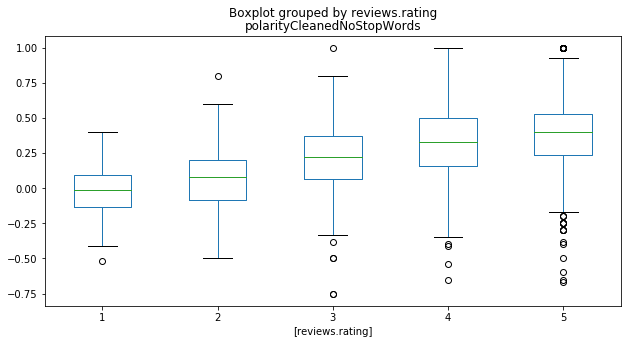

In [13]:
comp_rev_pol = df[['reviews.rating','polarityCleanedNoStopWords']]

# plt.scatter(comp_rev_pol["reviews.rating"],comp_rev_pol["polarityCleanedNoStopWords"])
# plt.show()

comp_rev_pol.boxplot(by='reviews.rating', figsize = (10,5), grid = False)

As we seen in the cell above, there are some entries in the data set where a rather negative polarity was calculated despite the good rating of 3+. One could argue, that the algorithm used to describe/calculate the polarity might need some fine-tuning.

In total however, there is a positive trend between the polarity and the review rating. We will have a look at the outlier group bottom right, as it is standing out. 

In [16]:
df.shape

(4576, 29)

In [14]:
df[(df["reviews.rating"] == 5) &  (df["polarityCleanedNoStopWords"] <= -0.25)][["name", "reviewTextCleaned"]]

,name,reviewTextCleaned
593,"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",not sure i would like this however words to songsgreat and ability to view my outdoor and indoor cameras is a plus still learning to use
825,"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",she knows all the answers i‚äôm used to speaking to her i recently visiting a friend and said ‚äúalexa ‚äú and my friend looked at me like i was crazy she doesn‚äôt have alexa
1245,Amazon - Echo Plus w/ Built-In Hub - Silver,we bought this for our son who wanted nothing for christmas he uses it all the time with lights music and locking the door he absolutely loves it we are now buying another home base for the rest of the house
1287,Amazon - Echo Plus w/ Built-In Hub - Silver,not sure it was a gift well be setting up after christmas
1698,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",my son is obsessed with his kids kindle a must have so they stay off your phone
2332,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",i got this because it is almost impossible to break
2395,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",goog tablet the only bad part is that you have to be creating a profile and thats where it gets complicated because when they sell u the tablet they saw its for kids
2516,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",my son loves his tablet or at least thats what he calls it
2752,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",tablet has worked without a hitch we bought it for my father who is just shy of with a couple of instructions hes been using it without further assistance
2861,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",i bought this for my grandson and it hasnt disappointed me at all he loves his tablet i am looking at buying his sister one next


Apparently it was some non-standard answers, mainly gifts. It also becomes evident, that there are some data duplicates (artefacts) in the dataset (e.g. id 4746, 4802, 4810 are the same product with different properties).  

 ## Subjectivity vs recommended by others 
 Hypothesis: Subjectivity might be negatively correlated to reviews from others. Let's See:  

In [12]:
df.columns

Index(['dateAdded', 'dateUpdated', 'name', 'brand', 'categories',
       'primaryCategories', 'manufacturer', 'manufacturerNumber',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'sourceURLs', 'polarity', 'subjectivity',
       'reviewTextCleaned', 'reviewTextCleanedNoStopWords', 'polarityCleaned',
       'subjectivityCleaned', 'polarityCleanedNoStopWords',
       'subjectivityCleanedNoStopWords'],
      dtype='object')

In [13]:
df["woerter_anz"] = list(map(lambda x : len(x.split()),df["reviews.text"]))

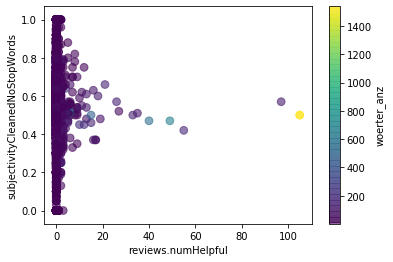

In [14]:
fig, ax = plt.subplots()
df.plot(kind='scatter', x='reviews.numHelpful', y='subjectivityCleanedNoStopWords',
        s=60, c='woerter_anz', cmap='viridis', ax=ax, alpha = 0.6) 
# Surprisingly, the reviews considered most helpful were the ones with an average subjectivity score! 
# There is also a central tendency of highest word count. 

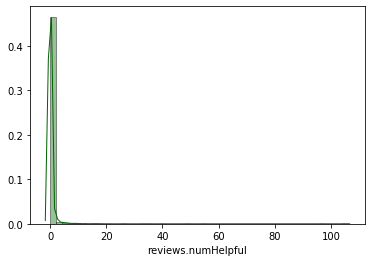

In [17]:
# most reviews however, had a very low number of being tagged helpful 
sns.distplot(df["reviews.numHelpful"], hist=True, kde=True, 
             # bins=int(180/5),
             color = 'darkgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

In [92]:
# the two reviews considered most helpful 
df[df["reviews.numHelpful"] > 80]["reviews.text"]

70      Looking at the picture and seeing it was 8th generation I assumed it would be a great device. I had an original Kindle but I stopped using it because it wasn't backlit. I thought an 8th generation would be backlit and the picture makes it look backlit but it is not. After 25 minutes on the phone with Amazon trying to make it brighter the technician finally realized that 8th generation is not supported with backlights. I took it back to Target and purchased The Paperwhite which was more money but definitely worth it. The 8th generation one is smaller so I assumed that was the reason for the price difference. Target made the experience pleasant.                                                                                                                                                                                                                                                                                                                                                     

# Explorative Analysis
## Looking at the Top 1000 Most positive and negative reviews to find out what the customers thinks is positive or negative about the product, respectively.

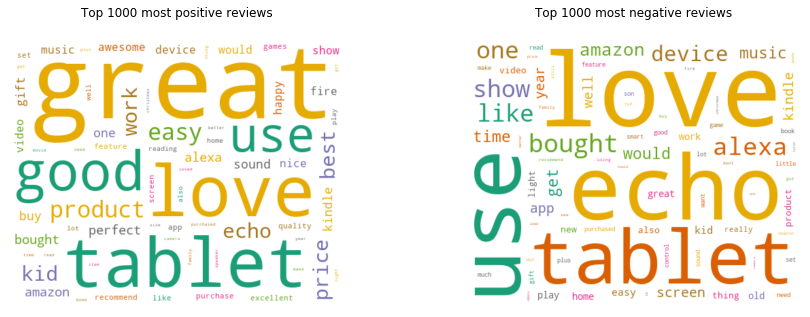

In [80]:
# Starting with Top 1000 Polarity 
TopDfSorted = df[['reviews.rating','polarityCleanedNoStopWords','reviewTextCleaned']].loc[df['polarityCleanedNoStopWords']> 0.5].iloc[:1000].sort_values('polarityCleanedNoStopWords',ascending = False )
BottomDfSorted = df[['reviews.rating','polarityCleanedNoStopWords','reviewTextCleaned']].loc[df['polarityCleanedNoStopWords']< .3].iloc[:1000].sort_values('polarityCleanedNoStopWords',ascending = True )

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
wordCloudCreation(TopDfSorted['reviewTextCleaned'],'Top 1000 most positive reviews')

ax2 = f.add_subplot(122)
wordCloudCreation(BottomDfSorted['reviewTextCleaned'],'Top 1000 most negative reviews')

### As one can see, the Top 1000 most positive reviews as well as the Top 1000 most negative reviews have very many words in common.
#### A further analysis, to find the real difference is to look at each written word, calculate the polarity of each word and plot the most negative and most positive words separately as well, respectively.

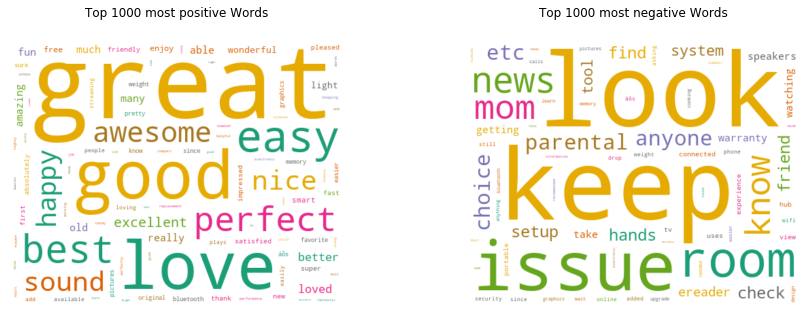

In [79]:
text = wholeReviewTextFromSeries(TopDfSorted['reviewTextCleaned'])
textAsDataFrame = pd.DataFrame(text,columns= ['Word','Counter'])
polarity = [txt(x).sentiment.polarity for x in textAsDataFrame['Word'] ]
textAsDataFrame['Polarity'] = polarity
words = ''
wordsNegative = ''
textAsDataFrame['Words'] = (textAsDataFrame['Word']+' ')*textAsDataFrame['Counter'].astype(int) # easy way to get all the words for the wordcloud :D
DataFrameToDraw=textAsDataFrame.sort_values('Polarity',ascending= False).iloc[:1000]
DataFrameToDrawNegative=textAsDataFrame.sort_values('Polarity',ascending= True).iloc[:1000]
for element in DataFrameToDraw['Words']:
    words = words + ' '+ element
for element in DataFrameToDrawNegative['Words']:
    wordsNegative = wordsNegative + ' ' + element 
    
        
words = words.split() #Converting into list for Wordclouds
wordsNegative = wordsNegative.split()


f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
wordCloudCreation(words,'Top 1000 most positive Words')

ax2 = f.add_subplot(122)
wordCloudCreation(wordsNegative,'Top 1000 most negative Words')  

#topDfSortedPolarity1 = pd.DataFrame(text,columns =['Words','Counter','Polarity']) # Create Data Frame to Sort_Values.


  &#x25B2; as the two Wordclouds show ... do not see a significant change in 'tone' considering the words in the negative camp compared to the positive  